# <font color = white > **Stochastic Simulation (5284STSI6Y) | MSc Computational Science at UvA** </font>

# <font color = LightGreen > **Assignment 2: Discrete-Event Simulation** </font>
*By Victor Piaskowski(15132625), Sanjhana Bhusal (14724383), and Lisa Pahladsingh(13846566)*

Link to Github Repository: https://github.com/BiggusVickus/Stochastic_Simulation

## <font color = LightBlue> **Exercise 1** </font>
#### <font color = Grey> ***MATHEMATICAL EXPLANATION*** </font>
In an M/M/2 queue, the arrival rate per server is given by $\lambda$ and the service rate per server is given by $\mu$. The utilization per server is denoted by $\rho$ and is calculated as $\rho = \frac{\lambda}{c\mu}$. Therefore, for $c=2$ we get that $\rho = \frac{\lambda}{2\mu}$.

The Erlang C formula is used to determine the probability that an arriving customer has to wait for service, and it is given by:

$$
P_w = \frac{\left(\frac{\rho^2}{2(1-\rho)}\right)}{\sum_{k=0}^{1}\frac{\rho^k}{k!} + \frac{\rho^2}{2(1-\rho)}}
$$

The average number of customers in the system (queue and service) for an M/M/2 queue is represented by $L$ and can be expressed as:

$$
L = \lambda W_q
$$

where $W_q$ is the average waiting time in the queue for an M/M/2 system. This average waiting time $W_q$ is given by:

$$
W_q = \frac{P_w}{\lambda}
$$

For an M/M/2 queue, the average waiting time is usually shorter than that of an M/M/1 queue, particularly when the system load $\rho$ is close to 1, which suggests a high utilization of the servers. This efficiency is due to the distribution of the workload between the two servers, allowing the system to handle a higher volume of traffic before queues build up significantly.



#### <font color = Grey> ***THEORETICAL EXPLANATION***</font>
In a queuing system where multiple servers are available (M/M/n), each server shares the task of handling incoming customers, as opposed to all customers lining up for a single server (M/M/1). This setup reduces the effective arrival rate of customers to each server because they are distributed across several servers. As a result, customers are likely to wait less because there is a higher chance that one of the servers will be free to help them sooner. Therefore, the system can manage more customer arrivals. This efficiency becomes especially significant when the system is close to its maximum capacity, denoted by a utilization value ($\rho$) near 1. At this point, the presence of multiple servers is more important, as they collectively handle the high volume of customers and keep wait times shorter than what a single server could achieve.

## <font color = LightBlue> **Exercise 2** </font>

Number of servers: 1, ρ: 0.85, Mean wait time: 0.58
Number of servers: 1, ρ: 0.8655555555555555, Mean wait time: 0.67
Number of servers: 1, ρ: 0.8811111111111111, Mean wait time: 0.71
Number of servers: 1, ρ: 0.8966666666666666, Mean wait time: 0.80
Number of servers: 1, ρ: 0.9122222222222222, Mean wait time: 1.06
Number of servers: 1, ρ: 0.9277777777777778, Mean wait time: 1.20
Number of servers: 1, ρ: 0.9433333333333334, Mean wait time: 1.93
Number of servers: 1, ρ: 0.9588888888888889, Mean wait time: 2.00
Number of servers: 1, ρ: 0.9744444444444444, Mean wait time: 3.66
Number of servers: 1, ρ: 0.99, Mean wait time: 6.21
Number of servers: 2, ρ: 0.85, Mean wait time: 0.27
Number of servers: 2, ρ: 0.8655555555555555, Mean wait time: 0.31
Number of servers: 2, ρ: 0.8811111111111111, Mean wait time: 0.35
Number of servers: 2, ρ: 0.8966666666666666, Mean wait time: 0.43
Number of servers: 2, ρ: 0.9122222222222222, Mean wait time: 0.51
Number of servers: 2, ρ: 0.9277777777777778, Mean wa

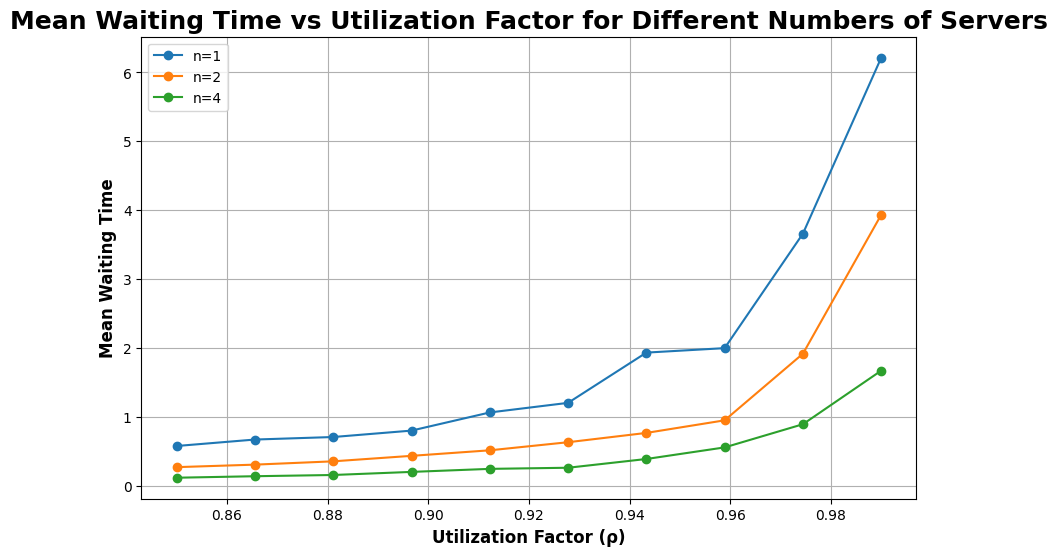

In [7]:
import simpy
import random
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# Parameters
RANDOM_SEED = 42
SIM_TIME = 10000  # Simulation time in minutes
MU = 10  # Average service rate (1/MU is average service time)
NUM_SERVERS = [1, 2, 4]  # Number of servers to simulate
RHO_VALUES = np.linspace(0.85, 0.99, 10)#[0.8, 0.9, 0.95, 0.99]  # Values of ρ to simulate

# Set the random seed for reproducibility
random.seed(RANDOM_SEED)

# Store statistics
wait_times = {n: {rho: [] for rho in RHO_VALUES} for n in NUM_SERVERS}
results = []  # Store results for plotting

# Customer process
def customer(env, name, servers, wait_times_list):
    arrival_time = env.now
    with servers.request() as request:
        yield request
        wait = env.now - arrival_time
        wait_times_list.append(wait)
        service_time = random.expovariate(MU)
        yield env.timeout(service_time)

# Source process
def source(env, num_servers, rho, servers, wait_times_list):
    """Generate customers with arrival rate based on number of servers and rho."""
    while True:
        arrival_rate = rho * num_servers * MU
        yield env.timeout(random.expovariate(arrival_rate))
        name = f'Customer{env.now:7.4f}'
        env.process(customer(env, name, servers, wait_times_list))

# Simulation setup
def run_simulation(num_servers, rho):
    env = simpy.Environment()
    servers = simpy.Resource(env, capacity=num_servers)
    wait_times_list = wait_times[num_servers][rho]
    env.process(source(env, num_servers, rho, servers, wait_times_list))
    env.run(until=SIM_TIME)

# Run the simulation for each number of servers and ρ values
for num_servers in NUM_SERVERS:
    for rho in RHO_VALUES:
        run_simulation(num_servers, rho)
        # Calculate mean waiting time and 95% confidence interval
        sample_wait_times = wait_times[num_servers][rho]
        mean_wait = statistics.mean(sample_wait_times)
        stdev_wait = statistics.stdev(sample_wait_times)
        sample_size = len(sample_wait_times)
        # ci_low, ci_upp = scipy.stats.t.interval(0.95, df=sample_size-1, loc=mean_wait, scale=stdev_wait/scipy.stats.sem(sample_wait_times))
        results.append((num_servers, rho, mean_wait))

        print(f'Number of servers: {num_servers}, ρ: {rho}, Mean wait time: {mean_wait:.2f}')

# Plotting the results
# for num_servers, rho, mean_wait, ci_lower, ci_upper in results:
#     plt.errorbar(rho, mean_wait, yerr=[[mean_wait - ci_lower], [ci_upper - mean_wait]], fmt='o', label=f'n={num_servers}')

# plt.xlabel('Traffic Intensity ($\\rho$)')
# plt.ylabel('Mean Waiting Time')
# plt.title('Mean Waiting Time vs Traffic Intensity for Different Numbers of Servers')
# plt.legend()
# plt.grid(True)
# plt.show()

# Prepare data for plotting
plot_data = {n: [] for n in NUM_SERVERS}
for num_servers, rho, mean_wait in results:
    plot_data[num_servers].append((rho, mean_wait))

# Plotting the results
plt.figure(figsize=(10, 6))
for num_servers in NUM_SERVERS:
    rhos, mean_waits = zip(*plot_data[num_servers])
    plt.plot(rhos, mean_waits, 'o-', label=f'n={num_servers}')

plt.xlabel('Utilization Factor (ρ)', fontsize=12, fontweight='bold')
plt.ylabel('Mean Waiting Time', fontsize=12, fontweight='bold')
plt.title('Mean Waiting Time vs Utilization Factor for Different Numbers of Servers', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()
